# Data Preprocessing

# Variable Description

member_id ---> unique ID assigned to each member.

loan_amnt ---> loan amount ($) applied by the member.

funded_amnt ---> loan amount ($) sanctioned by the bank

funded_amnt_inv ---> loan amount ($) sanctioned by the investors

term ---> term of loan (in months)

batch_enrolled ---> batch numbers allotted to members

int_rate ---> interest rate (%) on loan

grade ---> grade assigned by the bank

sub_grade ---> grade assigned by the bank

emp_title ---> job / Employer title of member

emp_length ---> employment length, where 0 means less than one year and 10 means ten or more years

home_ownership ---> status of home ownership

annual_inc ---> annual income ($) reported by the member

verification_status ---> status of income verified by the bank

pymnt_plan ---> indicates if any payment plan has started against loan

desc ---> loan description provided by member

purpose ---> purpose of loan

title ---> loan title provided by member

zip_code ---> first three digits of area zipcode of member

addr_state ---> living state of member

dti ---> ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income

delinq_2yrs ---> number of 30+ days delinquency in past 2 years

inq_last_6mths ---> number of inquiries in last 6 months

mths_since_last_delinq ---> number of months since last delinq

mths_since_last_record ---> number of months since last public record

open_acc ---> number of open credit line in member's credit line

pub_rec ---> number of derogatory public records

revol_bal ---> total credit revolving balance

revol_util ---> amount of credit a member is using relative to revol_bal

total_acc ---> total number of credit lines available in members credit line

initial_list_status ---> unique listing status of the loan - W(Waiting), F(Forwarded)

total_rec_int ---> interest received till date

total_rec_late_fee ---> Late fee received till date

recoveries ---> post charge off gross recovery

collection_recovery_fee ---> post charge off collection fee

collections_12_mths_ex_med ---> number of collections in last 12 months excluding medical collections

mths_since_last_major_derog ---> months since most recent 90 day or worse rating

application_type ---> indicates when the member is an individual or joint

verification_status_joint ---> indicates if the joint members income was verified by the bank

last_week_pay ---> indicates how long (in weeks) a member has paid EMI after batch enrolled

acc_now_delinq ---> number of accounts on which the member is delinquent

tot_coll_amt ---> total collection amount ever owed

tot_cur_bal ---> total current balance of all accounts

total_rev_hi_lim ---> total revolving credit limit

loan_status ---> status of loan amount, 1 = Defaulter, 0 = Non Defaulters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

In [3]:
start = timeit.default_timer()
df=pd.read_csv("data/train_indessa.csv")
stop = timeit.default_timer()
print("%.1f" %(stop - start)+" Sec") 

10.1 Sec


In [4]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.065607,0.067888,0.073426,-0.141030,0.034649,0.134179,0.049956,-0.127644,-0.008538,...,-0.075700,-0.113868,-0.072498,0.051447,0.056741,0.017607,0.026725,0.007278,0.046108,-0.489753
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.145037,0.330655,0.041866,-0.000454,-0.033693,-0.038069,...,0.031374,0.073326,0.052995,-0.014822,-0.037226,0.003196,-0.019994,0.327957,0.307989,-0.095713
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.145222,0.330493,0.042699,-0.000171,-0.034298,-0.038058,...,0.031022,0.072895,0.052797,-0.014663,-0.037214,0.003298,-0.019994,0.327955,0.307988,-0.097563
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.145251,0.329495,0.044952,0.000280,-0.038378,-0.035713,...,0.027770,0.071242,0.050261,-0.014240,-0.037181,0.003473,-0.019995,0.327981,0.308022,-0.101877
int_rate,-0.141030,0.145037,0.145222,0.145251,1.000000,-0.072061,0.163206,0.056767,0.228596,-0.032966,...,0.056141,0.107292,0.071187,0.013924,-0.013878,0.026984,0.002744,-0.091506,-0.164408,0.002590
annual_inc,0.034649,0.330655,0.330493,0.329495,-0.072061,1.000000,-0.175867,0.047873,0.033426,-0.051903,...,0.013254,0.007190,0.006332,-0.003960,-0.039256,0.014906,0.000196,0.416120,0.265846,-0.008596
dti,0.134179,0.041866,0.042699,0.044952,0.163206,-0.175867,1.000000,-0.007164,-0.016029,0.006087,...,-0.011336,0.002544,0.003708,0.001032,0.028913,0.007267,-0.016416,-0.014336,0.067941,-0.134020
delinq_2yrs,0.049956,-0.000454,-0.000171,0.000280,0.056767,0.047873,-0.007164,1.000000,0.021701,-0.564741,...,0.017519,-0.000473,0.000011,0.063426,-0.423864,0.133391,0.001720,0.065782,-0.040001,-0.045717
inq_last_6mths,-0.127644,-0.033693,-0.034298,-0.038378,0.228596,0.033426,-0.016029,0.021701,1.000000,0.013275,...,0.033678,0.045276,0.033264,0.007005,0.019156,-0.003681,0.013787,0.033267,0.006220,0.087339
mths_since_last_delinq,-0.008538,-0.038069,-0.038058,-0.035713,-0.032966,-0.051903,0.006087,-0.564741,0.013275,1.000000,...,-0.021201,-0.002314,-0.002755,-0.034682,0.699173,-0.136883,0.032696,-0.094698,-0.024684,0.029236


In [5]:
num_true=len(df.loc[df['loan_status']==True])
num_false=len(df.loc[df['loan_status']==False])
print("Number of True cases: {0}  ({1:2.2f}%)".format(num_true,(num_true/(num_true + num_false)) * 100))
print("Number of False cases: {0}  ({1:2.2f}%)".format(num_false,(num_false/(num_true + num_false)) * 100))

Number of True cases: 125827  (23.63%)
Number of False cases: 406601  (76.37%)


In [6]:
#check for correlated values
def plot_corr(df ,size=45):
    """ function plots a graphical correlation matrix for each pair of the column in the data frame.
    Input: Pandas DataFrame
    Display:Matrix of correlation between columns blue->cyan->->deep blue->purple->yellow.. less to more correlated"""
    
    corr=df.corr() #dataframe correlated function
    fig ,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr) #colorcode the rectangles by correlation values
    plt.xticks(range(len(corr.columns)),corr.columns)#draw x tick mark
    plt.yticks(range(len(corr.columns)),corr.columns)#draw y tick mark

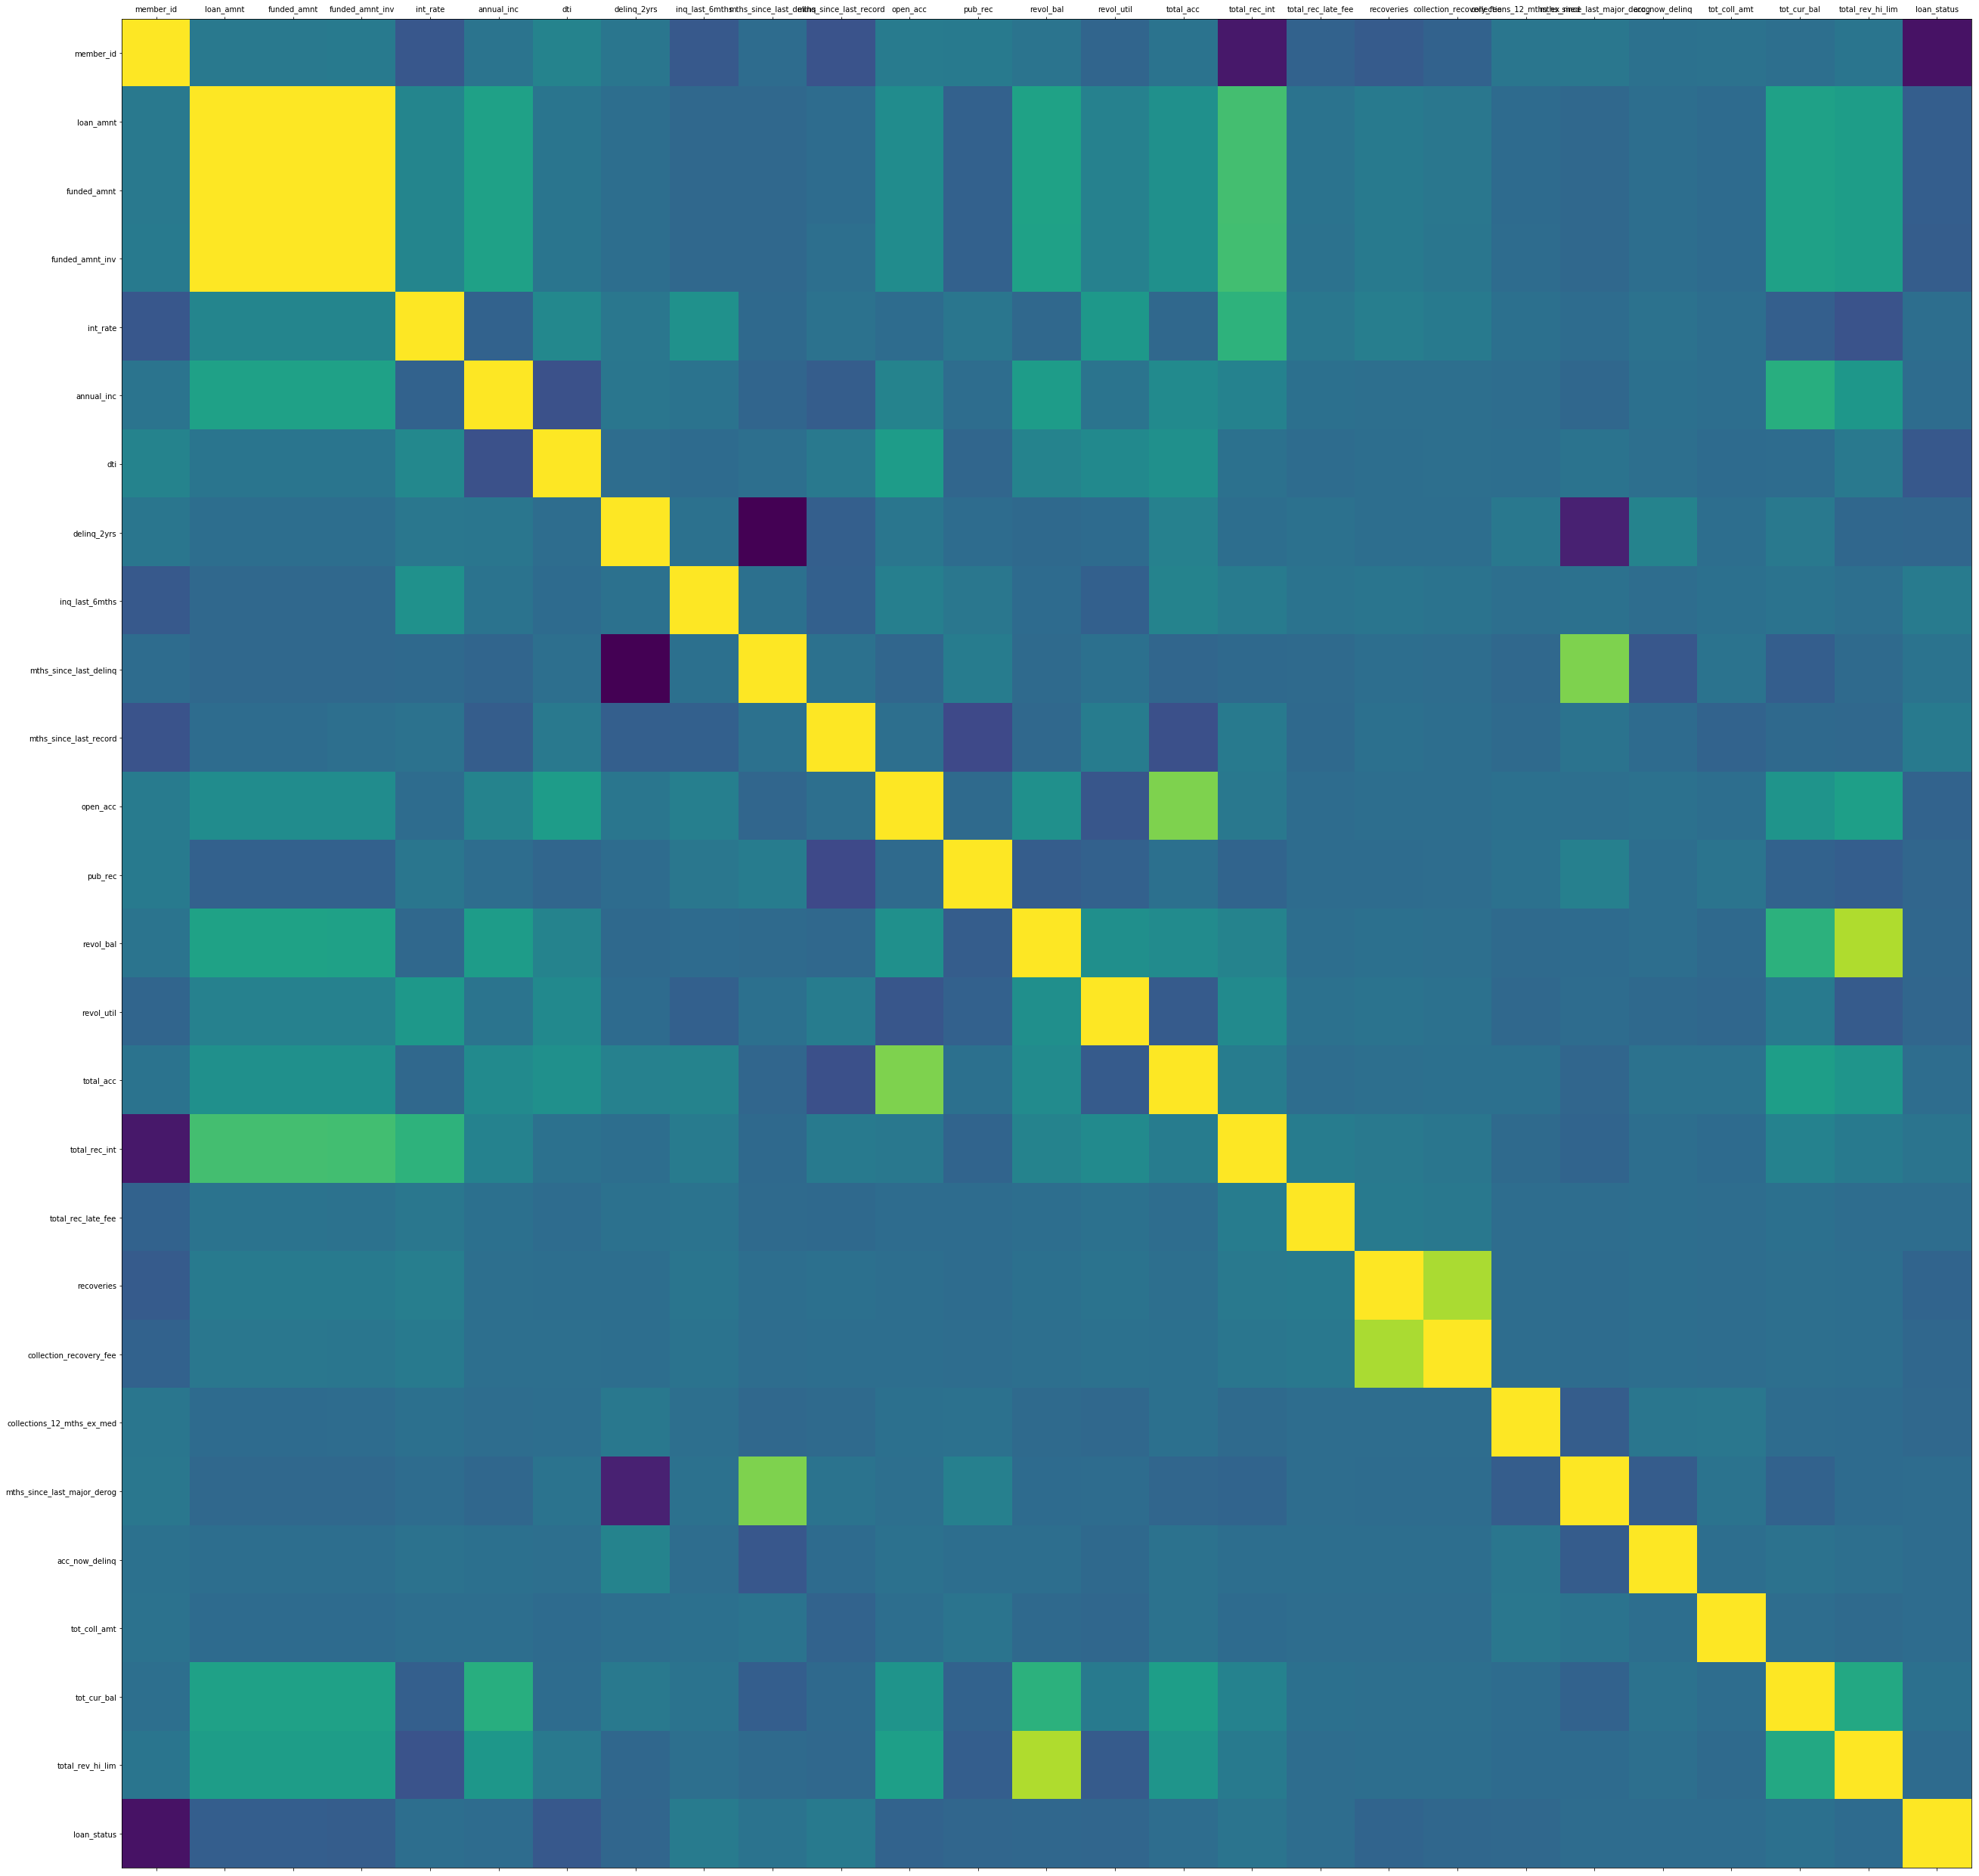

In [7]:
plot_corr(df)

In [8]:
del df['funded_amnt'] #correlated to loan amount

In [9]:
del df['funded_amnt_inv'] #correlated to loan amount

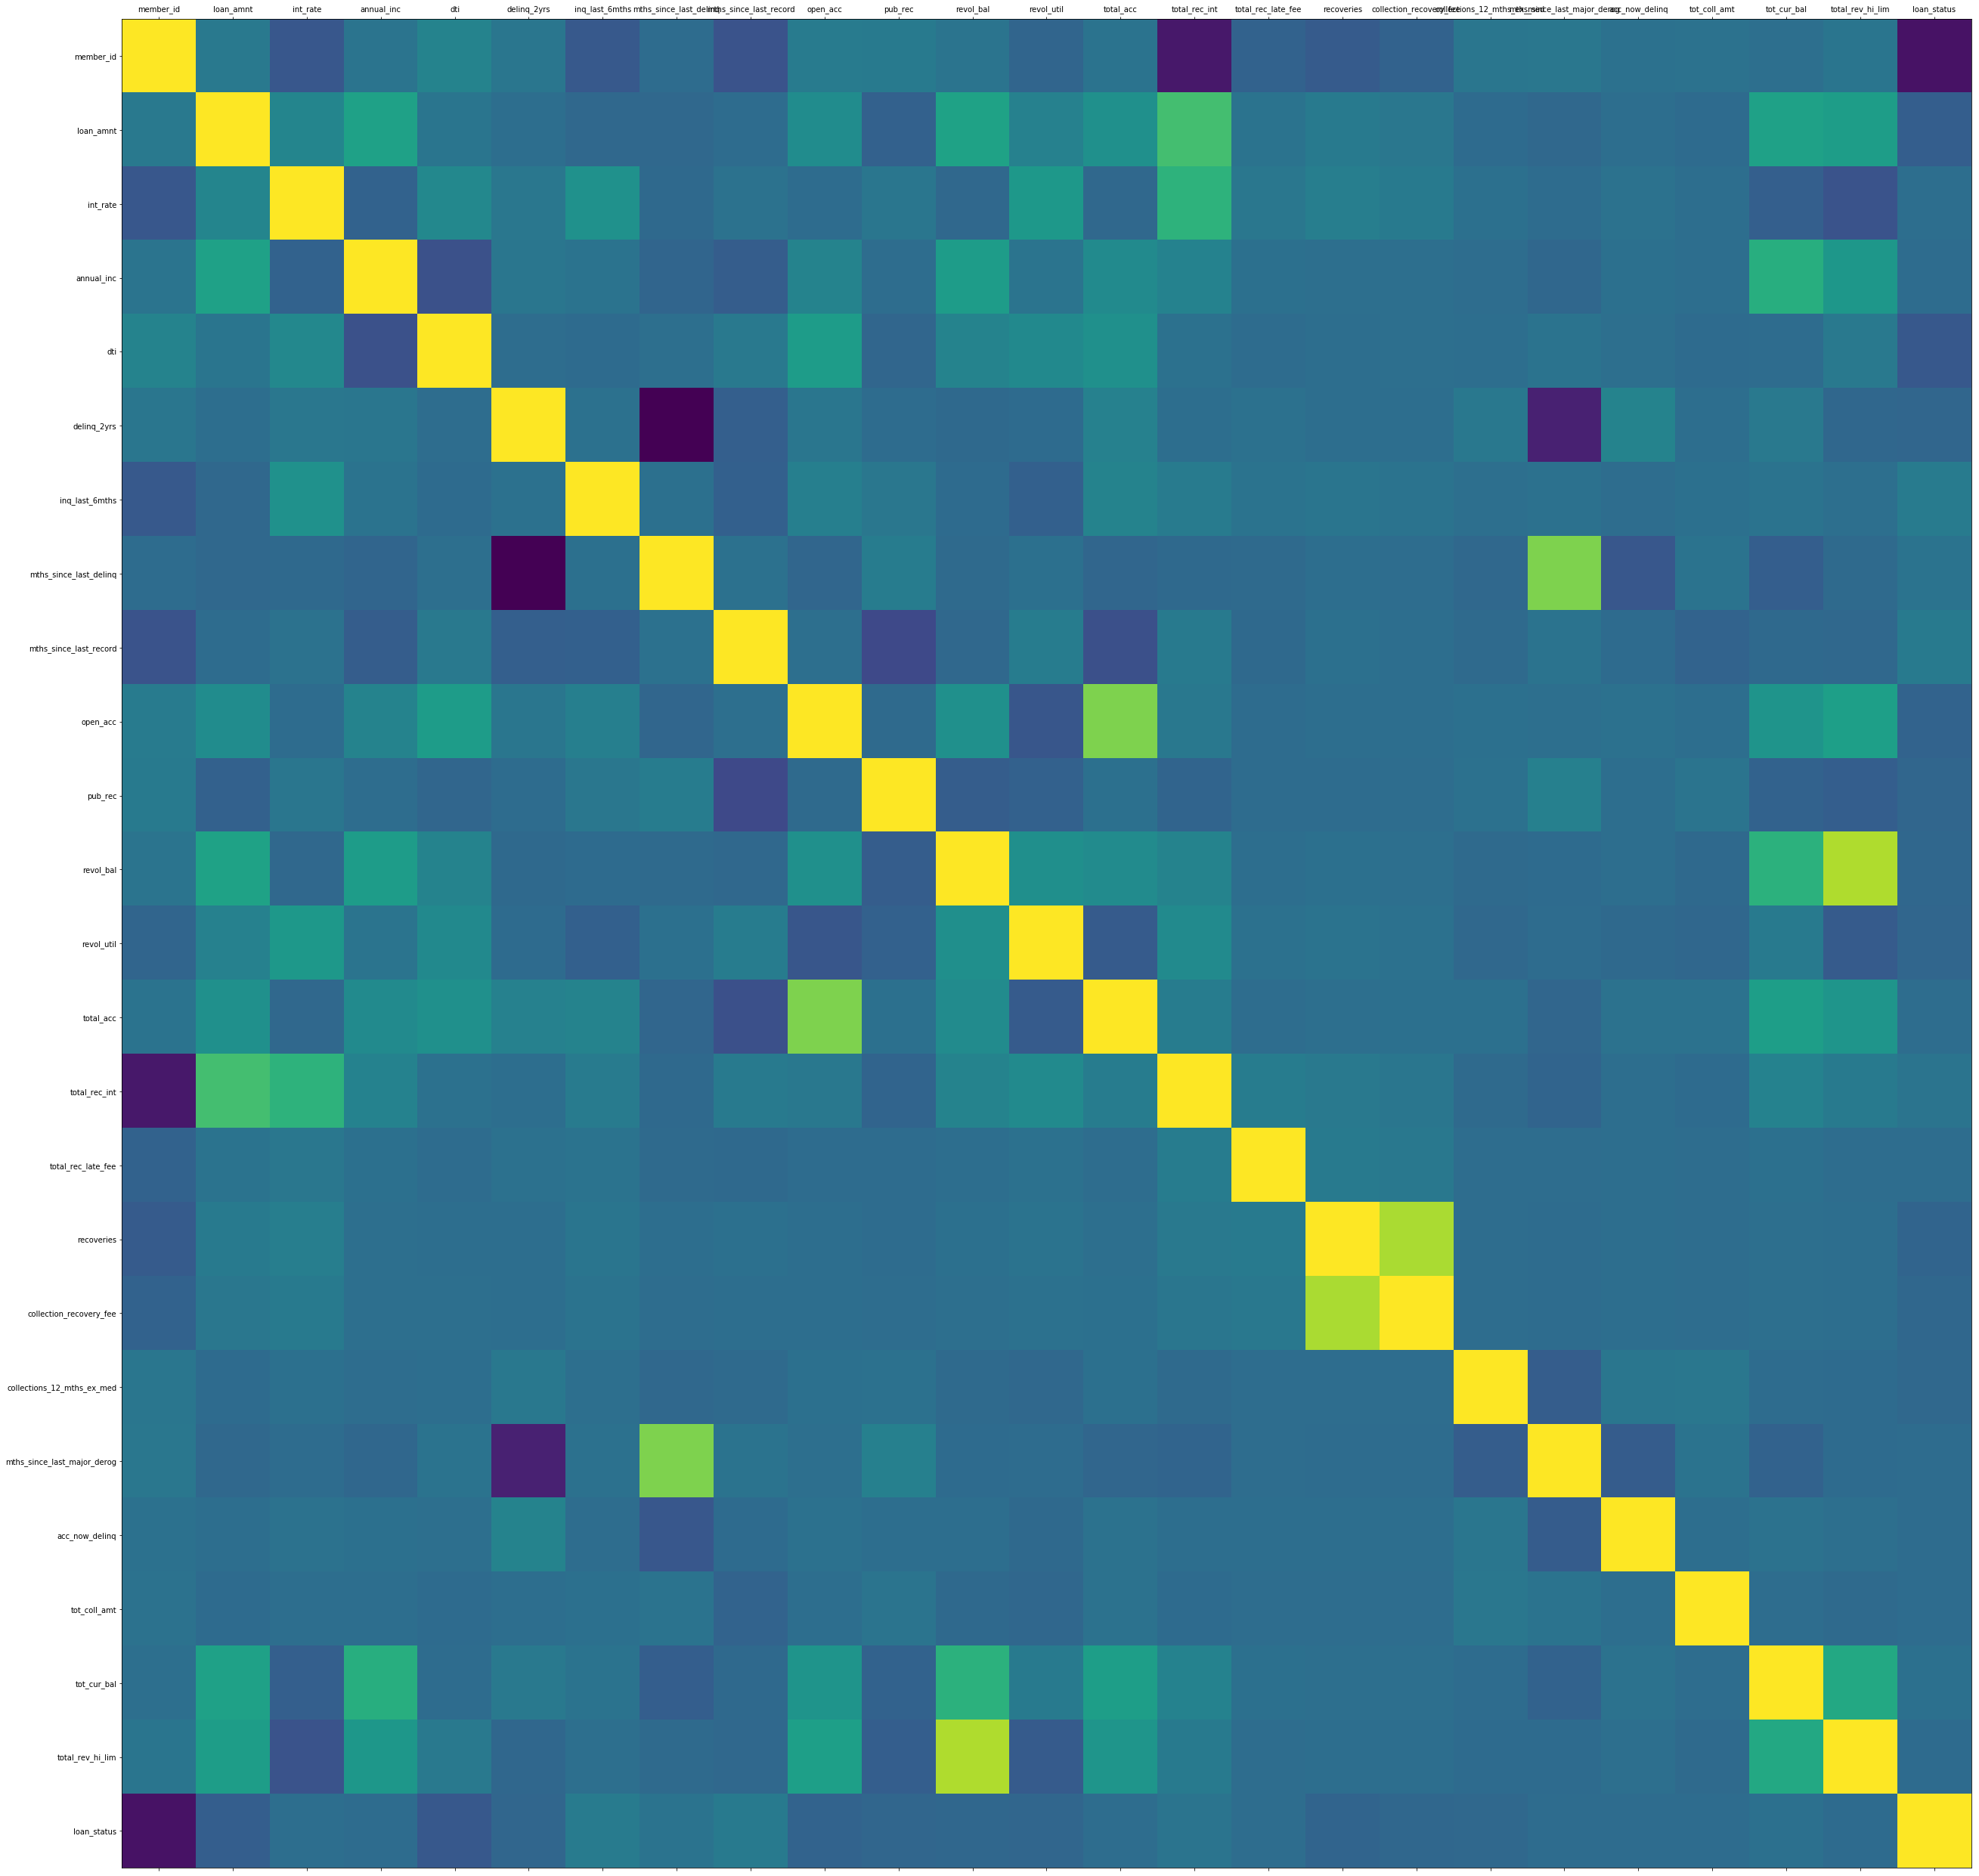

In [10]:
plot_corr(df) #after removing corelated variables

In [11]:
# explicitly include missing values bcoz dropna is False.
df['emp_title'].value_counts(dropna=False)

NaN                                        30833
Teacher                                     8280
Manager                                     6922
Registered Nurse                            3387
Owner                                       3305
RN                                          3255
Supervisor                                  3215
Sales                                       2668
Project Manager                             2473
Office Manager                              2189
Driver                                      2187
Director                                    1994
manager                                     1967
General Manager                             1954
owner                                       1782
teacher                                     1766
Engineer                                    1660
President                                   1646
Vice President                              1487
driver                                      1480
Attorney            

In [12]:
del df['mths_since_last_record']

In [13]:
del df['desc'] #not required

In [14]:
del df['verification_status_joint']

In [15]:
del df['zip_code'] #not related

In [16]:
del df['batch_enrolled'] #no impact

In [17]:
del df['addr_state'] #not related

In [18]:
del df['mths_since_last_major_derog']

In [19]:
del df['emp_title'] #since it got many categorical values which is not important so this attribute can be removed from dataset 

In [20]:
del df['title']#not required and impossibe to extract information from it

In [21]:
del df['purpose']

In [22]:
df

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,36 months,19.19,E,E3,9 years,OWN,28700.0,Source Verified,...,0.00,0.00,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,36 months,10.99,B,B4,< 1 year,MORTGAGE,65000.0,Source Verified,...,0.00,0.00,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,36 months,7.26,A,A4,2 years,OWN,45000.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,36 months,19.72,D,D5,10+ years,RENT,105000.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,36 months,10.64,B,B2,10+ years,RENT,52000.0,Verified,...,0.00,0.00,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,36 months,8.90,A,A5,2 years,MORTGAGE,120000.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,36 months,7.90,A,A4,5 years,RENT,75000.0,Source Verified,...,0.00,0.00,0.0,INDIVIDUAL,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,36 months,9.17,B,B1,8 years,MORTGAGE,54000.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,36 months,13.99,C,C4,7 years,MORTGAGE,92000.0,Not Verified,...,0.00,0.00,0.0,INDIVIDUAL,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,60 months,17.14,D,D4,2 years,MORTGAGE,72000.0,Verified,...,0.00,0.00,0.0,INDIVIDUAL,52th week,0.0,0.0,76034.0,33200.0,0


In [23]:
df.shape

(532428, 33)

In [24]:
df.nunique() #checking number of unique values for each variable

member_id                     532428
loan_amnt                       1370
term                               2
int_rate                         535
grade                              7
sub_grade                         35
emp_length                        11
home_ownership                     6
annual_inc                     33988
verification_status                3
pymnt_plan                         2
dti                             4058
delinq_2yrs                       26
inq_last_6mths                    23
mths_since_last_delinq           147
open_acc                          73
pub_rec                           28
revol_bal                      63459
revol_util                      1265
total_acc                        126
initial_list_status                2
total_rec_int                 243149
total_rec_late_fee              4073
recoveries                     14024
collection_recovery_fee        12617
collections_12_mths_ex_med         9
application_type                   2
l

In [25]:
df.isnull().sum() #checking number of null values present in dataset

member_id                          0
loan_amnt                          0
term                               0
int_rate                           0
grade                              0
sub_grade                          0
emp_length                     26891
home_ownership                     0
annual_inc                         3
verification_status                0
pymnt_plan                         0
dti                                0
delinq_2yrs                       16
inq_last_6mths                    16
mths_since_last_delinq        272554
open_acc                          16
pub_rec                           16
revol_bal                          0
revol_util                       287
total_acc                         16
initial_list_status                0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
collections_12_mths_ex_med        95
application_type                   0
l

In [26]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''

df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df['term'] = pd.to_numeric(df['term'], errors='coerce')



In [27]:
print('Transform: emp_length...')
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')


print('Transform: last_week_pay...')
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce')

print('Transform done.')

Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [28]:
df.emp_length.head()

0     9.0
1     0.0
2     2.0
3    10.0
4    10.0
Name: emp_length, dtype: float64

In [29]:
df.last_week_pay.head()

0     26.0
1      9.0
2      9.0
3    135.0
4     96.0
Name: last_week_pay, dtype: float64

In [30]:
df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,36,19.19,E,43,9.0,OWN,28700.0,Source Verified,...,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,36,10.99,B,14,0.0,MORTGAGE,65000.0,Source Verified,...,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,36,7.26,A,4,2.0,OWN,45000.0,Not Verified,...,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,36,19.72,D,35,10.0,RENT,105000.0,Not Verified,...,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,36,10.64,B,12,10.0,RENT,52000.0,Verified,...,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0,47033.0,0


In [31]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt' , 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq',  'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    df[col].fillna(df[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med','delinq_2yrs','inq_last_6mths','pub_rec']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    df[col].fillna(0, inplace=True)
print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Imputation with Zero: delinq_2yrs
Imputation with Zero: inq_last_6mths
Imputation with Zero: pub_rec
Missing value imputation done.


In [32]:
df.isnull().sum()

member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

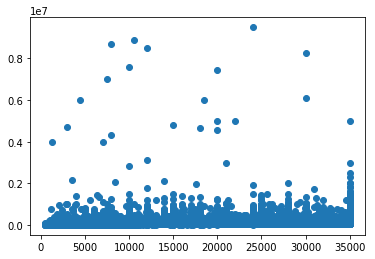

In [33]:
plt.scatter(df['loan_amnt'],df['annual_inc']) 
plt.show() 

# Term

In [34]:
df.groupby('term').loan_status.count()

term
36    372793
60    159635
Name: loan_status, dtype: int64

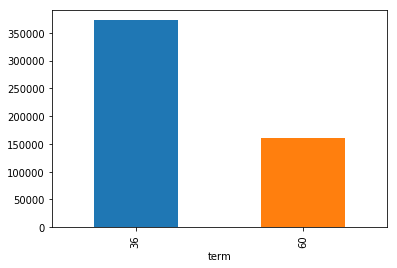

In [35]:
df.groupby('term').loan_status.count().plot(kind='bar')

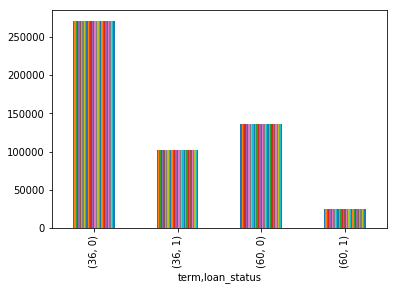

In [36]:
df.groupby(['term','loan_status']).count().plot(kind='bar')
plt.legend().set_visible(False)

# Grade

In [37]:
df.grade.value_counts()

B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64

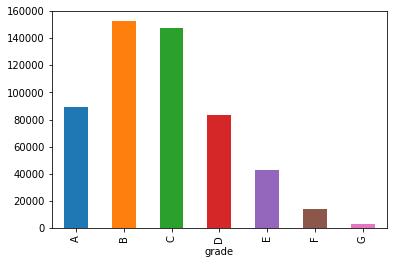

In [38]:
df.groupby('grade').loan_status.count().plot(kind='bar')

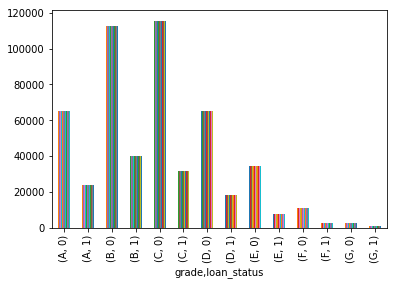

In [39]:
plt.subplot(df.groupby(['grade','loan_status']).count().plot(kind='bar'))
plt.legend().set_visible(False)
plt.show()

# Ownership

In [40]:
df.home_ownership.describe()

count       532428
unique           6
top       MORTGAGE
freq        265940
Name: home_ownership, dtype: object

In [41]:
pd.crosstab(df.home_ownership, df.loan_status)

loan_status,0,1
home_ownership,,
ANY,2,1
MORTGAGE,202344,63596
NONE,8,28
OTHER,27,90
OWN,41737,10927
RENT,162483,51185


In [42]:
df.home_ownership.value_counts()

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64

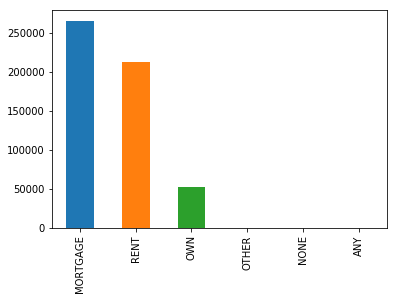

In [43]:
df.home_ownership.value_counts().plot(kind='bar')

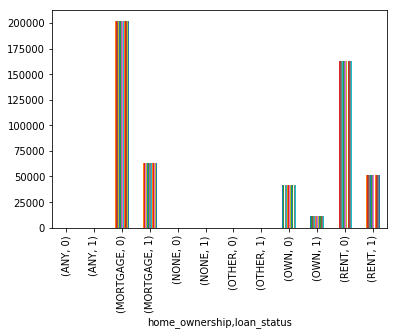

In [44]:
plt.subplot(df.groupby(['home_ownership','loan_status']).count().plot(kind='bar'))
plt.legend().set_visible(False)
plt.show()

# Verification Status 

In [45]:
df.verification_status.describe()

count              532428
unique                  3
top       Source Verified
freq               197750
Name: verification_status, dtype: object

In [46]:
pd.crosstab(df.verification_status, df.loan_status)

loan_status,0,1
verification_status,,
Not Verified,115028,44948
Source Verified,161329,36421
Verified,130244,44458


In [47]:
df.home_ownership.value_counts()

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64

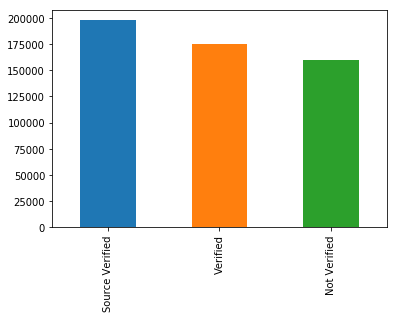

In [48]:
df.verification_status.value_counts().plot(kind='bar')

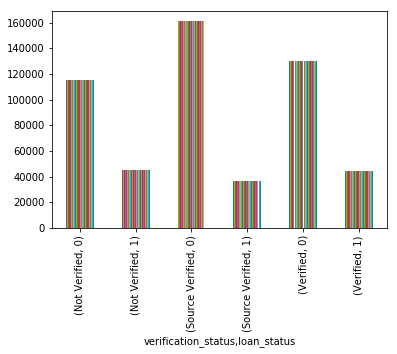

In [49]:
plt.subplot(df.groupby(['verification_status','loan_status']).count().plot(kind='bar'))
plt.legend().set_visible(False)
plt.show()

# Application Type

In [50]:
df.application_type.value_counts()

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64

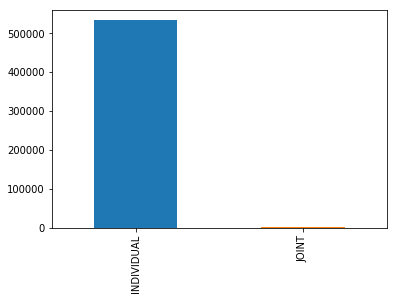

In [51]:
df.application_type.value_counts().plot(kind='bar')

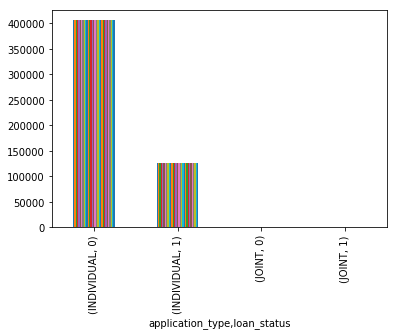

In [52]:
plt.subplot(df.groupby(['application_type','loan_status']).count().plot(kind='bar'))
plt.legend().set_visible(False)
plt.show()

In [53]:
pd.crosstab(df.application_type, df.loan_status)

loan_status,0,1
application_type,,
INDIVIDUAL,406297,125826
JOINT,304,1


# payment Plan

In [54]:
df.pymnt_plan.describe()

count     532428
unique         2
top            n
freq      532420
Name: pymnt_plan, dtype: object

In [55]:
pd.crosstab(df.pymnt_plan, df.loan_status)

loan_status,0,1
pymnt_plan,,
n,406595,125825
y,6,2


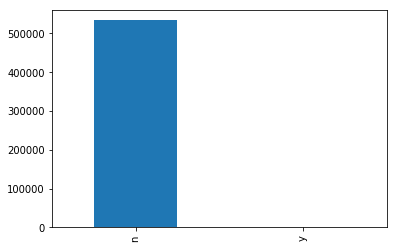

In [56]:
df.pymnt_plan.value_counts().plot(kind='bar')

In [57]:
del df['pymnt_plan']

#  Feature Engineering

In [58]:
loan_to_income=df['annual_inc']/df['loan_amnt']

In [59]:
#loan_to_income can be a important feature in predicting the defaulter so it can be added in the training set
df['loan_to_income']=loan_to_income

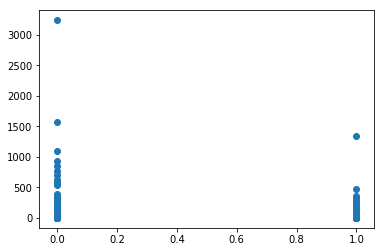

In [60]:
plt.scatter(df['loan_status'],loan_to_income) 
plt.show()

In [61]:
'''All the amounts are calculated as ratios in terms of "loan_amnt" so for all negative aspects related to defaulter 
we will take a single variable "neg_state" which is stored as sum of ratios of all the negative attributes in terms of loan amount'''
df['neg_state'] = df['acc_now_delinq'] + (df['total_rec_late_fee']/df['loan_amnt']) + (df['recoveries']/df['loan_amnt']) + (df['collection_recovery_fee']/df['loan_amnt']) + (df['collections_12_mths_ex_med']/df['loan_amnt'])

In [62]:
# For the sake of this model just a boolean flag is used, if things had gone bad its 0 or else 1.
df.loc[df['neg_state'] > 0, 'neg_state'] = 1

In [63]:
# Interest paid so far
df['int_paid'] = df['total_rec_int'] + df['total_rec_late_fee']

In [64]:
# Calculating total repayments received so far, in terms of EMI or recoveries after charge off and storing them as percentage for similar weightage
df['total_repayment_progress'] = ((df['last_week_pay']/(df['term']/12*52+1))*100) + ((df['recoveries']/df['loan_amnt']) * 100)

In [65]:
 '''Total account acquired by bank is not a dominant feature for loan defaulter prediction 
 so Total number of available 'credit lines' from where a loan can be taken(dominant feature) is used as additional attribute'''
df['avl_lines'] = df['total_acc'] - df['open_acc']

In [66]:
y=df['loan_status']
del df['loan_status']
df['loan_status']=y
df.nunique()

member_id                     532428
loan_amnt                       1370
term                               2
int_rate                         535
grade                              7
sub_grade                         35
emp_length                        11
home_ownership                     6
annual_inc                     33988
verification_status                3
dti                             4058
delinq_2yrs                       26
inq_last_6mths                    23
mths_since_last_delinq           147
open_acc                          73
pub_rec                           28
revol_bal                      63459
revol_util                      1265
total_acc                        126
initial_list_status                2
total_rec_int                 243149
total_rec_late_fee              4073
recoveries                     14024
collection_recovery_fee        12617
collections_12_mths_ex_med         9
application_type                   2
last_week_pay                     97
a

In [67]:
df['home_ownership'].replace(to_replace='MORTGAGE', value='2', regex=True, inplace=True)
df['home_ownership'].replace(to_replace='RENT', value='3', regex=True, inplace=True)
df['home_ownership'].replace(to_replace='OWN', value='1', regex=True, inplace=True)
df['home_ownership'].replace(to_replace='OTHER', value='4', regex=True, inplace=True)
df['home_ownership'].replace(to_replace='NONE', value='5', regex=True, inplace=True)
df['home_ownership'].replace(to_replace='ANY', value='6', regex=True, inplace=True)

In [68]:
df['verification_status'].replace(to_replace='Source Verified', value='1', regex=True, inplace=True)
df['verification_status'].replace(to_replace='Not Verified', value='3', regex=True, inplace=True)
df['verification_status'].replace(to_replace='Verified', value='2', regex=True, inplace=True)


In [69]:
df['application_type'].replace(to_replace='INDIVIDUAL', value='1', regex=True, inplace=True)
df['application_type'].replace(to_replace='JOINT', value='2', regex=True, inplace=True)

In [70]:
df['initial_list_status'].replace(to_replace='w', value='0', regex=True, inplace=True)
df['initial_list_status'].replace(to_replace='f', value='1', regex=True, inplace=True)

In [71]:
df.isnull().sum()

member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
loan_to_

# Learning Curves

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
train_sizes = [1, 5000, 20000,10000, 20000, 40000, 100000,120000,150000,180000,200000,250000,300000,350000,400000]
#train_sizes = [1, 100, 500, 2000, 5000, 7654]

features=['loan_amnt', 'term', 'int_rate', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti',  'revol_bal','revol_util', 'initial_list_status', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_to_income', 'neg_state', 'int_paid', 'total_repayment_progress',
       'avl_lines','inq_last_6mths','delinq_2yrs','pub_rec']
target='loan_status'
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X=df[features],
                                                   y = df[target], train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 14 instead of 15).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


In [73]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.14905526 -0.14362562 -0.14362562 -0.14362562 -0.14362562]
 [-0.14815886 -0.14528253 -0.14528253 -0.14528253 -0.14528253]
 [-0.1477846  -0.14776022 -0.14776022 -0.14776022 -0.14776022]
 [-0.14925762 -0.15003068 -0.15003068 -0.15003068 -0.15003068]
 [-0.15026881 -0.15002093 -0.15002093 -0.15002093 -0.15002093]
 [-0.15039859 -0.15015405 -0.14976752 -0.14976752 -0.14976752]
 [-0.14972806 -0.14951551 -0.14989491 -0.14989491 -0.14989491]
 [-0.14971496 -0.14951579 -0.15018626 -0.15018626 -0.15018626]
 [-0.1496772  -0.14948284 -0.15020992 -0.15020992 -0.15020992]
 [-0.1494678  -0.14931033 -0.15003116 -0.14990345 -0.14990345]
 [-0.14980077 -0.14967368 -0.15026927 -0.14982892 -0.14982892]
 [-0.14994188 -0.14987058 -0.15034907 -0.14974894 -0.14967047]
 [-0.14998451 -0.14992184 -0.15034325 -0.14981336 -0.14986095]]

 ----------------------------------------------------------------------

Validation scores:

 [[-

In [74]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) #separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1        -0.000000
5000      0.144712
10000     0.145858
20000     0.147765
40000     0.149876
100000    0.150071
120000    0.149971
150000    0.149786
180000    0.149958
200000    0.149958
250000    0.149723
300000    0.149880
350000    0.149916
400000    0.149985
dtype: float64

 --------------------

Mean validation scores

 1         0.341903
5000      0.150943
10000     0.150378
20000     0.150315
40000     0.150235
100000    0.150163
120000    0.150125
150000    0.150062
180000    0.150071
200000    0.150068
250000    0.150063
300000    0.150050
350000    0.150009
400000    0.150009
dtype: float64


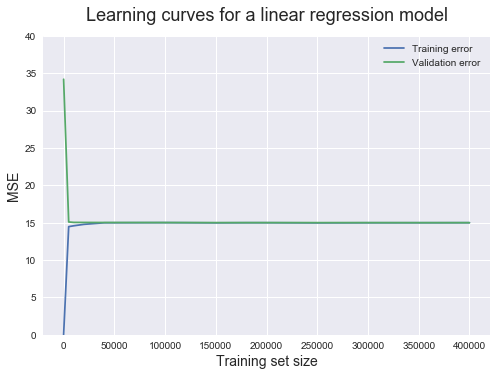

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
validation_scores_mean=validation_scores_mean*100
train_scores_mean=train_scores_mean*100

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 37 columns):
member_id                     532428 non-null int64
loan_amnt                     532428 non-null int64
term                          532428 non-null int64
int_rate                      532428 non-null float64
grade                         532428 non-null object
sub_grade                     532428 non-null int64
emp_length                    532428 non-null float64
home_ownership                532428 non-null object
annual_inc                    532428 non-null float64
verification_status           532428 non-null object
dti                           532428 non-null float64
delinq_2yrs                   532428 non-null float64
inq_last_6mths                532428 non-null float64
mths_since_last_delinq        532428 non-null float64
open_acc                      532428 non-null float64
pub_rec                       532428 non-null float64
revol_bal                     532428

In [77]:
del df['grade']

In [78]:
del df['member_id']

In [79]:
df=df.loc[0:20000,:]

In [80]:
df

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_to_income,neg_state,int_paid,total_repayment_progress,avl_lines,loan_status
0,14350,36,19.19,43,9.0,1,28700.0,1,33.88,0.0,...,0.0,0.0,28699.0,30800.0,2.000000,0.0,1173.84,16.560510,14.0,0
1,4800,36,10.99,14,0.0,2,65000.0,1,3.64,0.0,...,0.0,0.0,9974.0,32900.0,13.541667,0.0,83.95,5.732484,7.0,0
2,10000,36,7.26,4,2.0,1,45000.0,3,18.42,0.0,...,0.0,65.0,38295.0,34900.0,4.500000,0.0,56.47,5.732484,14.0,0
3,15000,36,19.72,35,10.0,3,105000.0,3,14.97,0.0,...,0.0,0.0,55564.0,24700.0,7.000000,0.0,4858.62,85.987261,11.0,0
4,16000,36,10.64,12,10.0,3,52000.0,2,20.16,0.0,...,0.0,0.0,47159.0,47033.0,3.250000,0.0,2296.41,61.146497,16.0,0
5,15000,36,8.90,5,2.0,2,120000.0,3,12.30,0.0,...,0.0,0.0,350619.0,29500.0,8.000000,0.0,1957.24,71.974522,12.0,0
6,5000,36,7.90,4,5.0,3,75000.0,1,5.70,0.0,...,0.0,1023.0,13272.0,55500.0,15.000000,0.0,578.36,74.522293,10.0,1
7,6000,36,9.17,11,8.0,2,54000.0,3,11.63,0.0,...,0.0,0.0,272579.0,11800.0,9.000000,0.0,637.51,49.681529,36.0,0
8,6000,36,13.99,24,7.0,2,92000.0,3,30.85,0.0,...,0.0,0.0,281521.0,62100.0,15.333333,0.0,621.72,28.025478,11.0,0
9,34550,60,17.14,34,2.0,2,72000.0,2,33.92,0.0,...,0.0,0.0,76034.0,33200.0,2.083936,0.0,5535.46,19.923372,18.0,0


# Recursive Feature Elimination

In [81]:
from sklearn import linear_model
X_train =df.iloc[:,:-1]
y_train =df.iloc[:,-1]
from sklearn.feature_selection import RFE
# create the RFE model
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 15)
rfe = rfe.fit(X_train.values, y_train.values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False  True  True  True False  True False  True  True  True  True False
 False  True False False False  True False False  True False  True  True
 False  True False False False False  True False False False]
[16  1  1  1  4  1 19  1  1  1  1 13  3  1 17  7 12  1 10  8  1  9  1  1
 14  1 15 20 18  6  1 11  5  2]


C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
df.keys()

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_to_income', 'neg_state',
       'int_paid', 'total_repayment_progress', 'avl_lines', 'loan_status'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split
feature_col_names=['loan_amnt','term','int_rate','sub_grade','emp_length','home_ownership','loan_to_income','verification_status','dti','inq_last_6mths',
                  'mths_since_last_delinq','pub_rec', 'revol_bal','revol_util','initial_list_status','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','neg_state','int_paid',
                  'total_repayment_progress','avl_lines']
predected_class_names=['loan_status']

X=df[feature_col_names].values #predector feature column
y=df[predected_class_names].values #predicted class(1=true 0=false) column
split_test_size=0.30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split_test_size, random_state=42) #test_size=0.3 is 30% and 42 is seed for random nos generator


In [84]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


# Logistic regression Algorithm

In [85]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime
st = datetime.now()
lr_model =LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='warn',n_jobs=None, penalty='l2', random_state=42, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
lr_model.fit(X_train,y_train.ravel())
print(datetime.now()-st)

''' C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False '''

0:00:00.484254


" C=0.7, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='warn',\n          n_jobs=None, penalty='l2', random_state=42, solver='warn',\n          tol=0.0001, verbose=0, warm_start=False "

In [86]:
from sklearn import metrics
lr_predict_test=lr_model.predict(X_test)
print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))

Accuracy: 0.798534


In [87]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")

print("classification report")
print(metrics.classification_report(y_test,lr_predict_test, labels=[1,0]))

Confusion Matrix
[[ 277 1130]
 [  79 4515]]

classification report
              precision    recall  f1-score   support

           1       0.78      0.20      0.31      1407
           0       0.80      0.98      0.88      4594

   micro avg       0.80      0.80      0.80      6001
   macro avg       0.79      0.59      0.60      6001
weighted avg       0.79      0.80      0.75      6001



In [88]:
from sklearn.model_selection import train_test_split
feature_col_names=['term','int_rate', 'sub_grade','home_ownership','verification_status','dti','delinq_2yrs','inq_last_6mths','pub_rec','initial_list_status','recoveries',
                  'collections_12_mths_ex_med','application_type','acc_now_delinq','neg_state']
predected_class_names=['loan_status']

X=df[feature_col_names].values #predector feature column
y=df[predected_class_names].values #predicted class(1=true 0=false) column
split_test_size=0.30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split_test_size, random_state=42) #test_size=0.3 is 30% and 42 is seed for random nos generator


In [89]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime
st = datetime.now()
lr_model =LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='warn',n_jobs=None, penalty='l2', random_state=42, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
lr_model.fit(X_train,y_train.ravel())
print(datetime.now()-st)

0:00:00.124974


In [90]:
from sklearn import metrics
lr_predict_test=lr_model.predict(X_test)
print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))

Accuracy: 0.788535


In [91]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")

print("classification report")
print(metrics.classification_report(y_test,lr_predict_test, labels=[1,0]))

Confusion Matrix
[[ 352 1055]
 [ 214 4380]]

classification report
              precision    recall  f1-score   support

           1       0.62      0.25      0.36      1407
           0       0.81      0.95      0.87      4594

   micro avg       0.79      0.79      0.79      6001
   macro avg       0.71      0.60      0.62      6001
weighted avg       0.76      0.79      0.75      6001



C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1st max value of 0.252 occured at C=1.300


Text(0, 0.5, 'recall score')

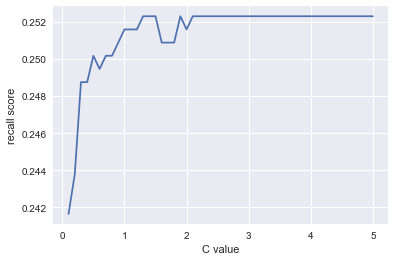

In [92]:
#NOT SATISFYING VALUES i.e recall<<1
#setting regularization parameter
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1st max value of 0.714 occured at C=0.300


Text(0, 0.5, 'recall score')

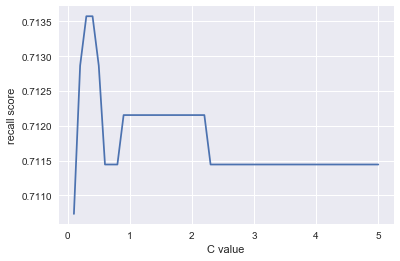

In [93]:
#logistic regression with class_weight='balanced'
#setting regularization parameter
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val,class_weight='balanced', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [94]:
#Logistic Regression again with new c
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(class_weight='balanced',C=best_score_C_val,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test=lr_model.predict(X_test)

#training
print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))

print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")

print("classification report")
print(metrics.classification_report(y_test,lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test,lr_predict_test))

Accuracy: 0.705049
Confusion Matrix
[[1004  403]
 [1367 3227]]

classification report
              precision    recall  f1-score   support

           1       0.42      0.71      0.53      1407
           0       0.89      0.70      0.78      4594

   micro avg       0.71      0.71      0.71      6001
   macro avg       0.66      0.71      0.66      6001
weighted avg       0.78      0.71      0.73      6001

0.7135749822316987


C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
#Logistic Regression (CV cross validation)
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize\n",
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [96]:
#prediction on test data

lr_cv_predict_test = lr_cv_model.predict(X_test)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test,labels=[1,0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test,labels=[1,0]))
#print(metrics.recall_score(y_test, lr_predict_test,labels[1,0]))

Accuracy: 0.7045
[[1004  403]
 [1370 3224]]

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.71      0.53      1407
           0       0.89      0.70      0.78      4594

   micro avg       0.70      0.70      0.70      6001
   macro avg       0.66      0.71      0.66      6001
weighted avg       0.78      0.70      0.72      6001

